# AdaBoost 구현

### sklear에 있는 AdaBoostClassifier을 이용하여 구현 함

##### -각 모델의 작동을 확인 하기 위해 데이터를 테스트 세트와 트레이닝 세트로 나눔
##### - parameter는 여러가지가 있지만 가장  많이 쓰이는 3가지
        1. base_estimator: 모델을 연습시키기 위해 사용되는 약한 분류기 (default: DecisionTreeClassifier / 다른 머신러닝알고리즘가능)
        2. n_estimators: 반복적인 학습에 사용될 약한 분류기의 개수 (default = 50)
        3. learning_rate: 각각의 분류기의 가중치를 learning_rate으로 줄임 (n_estimators와 trade-off가 있음) (default = 1)
##### - AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=1.0)

In [24]:
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [25]:
breast_cancer = load_breast_cancer()

x = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
y = pd.Categorical.from_codes(breast_cancer.target, breast_cancer.target_names)

In [26]:
encoder = LabelEncoder()
binary_encoded_y = pd.Series(encoder.fit_transform(y))

In [27]:
train_x, test_x, train_y, test_y = train_test_split(x, binary_encoded_y, random_state=1)

In [28]:
classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200)
classifier.fit(train_x, train_y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=200)

In [29]:
predictions = classifier.predict(test_x)

In [30]:
confusion_matrix(test_y, predictions)

array([[86,  2],
       [ 3, 52]])

In [16]:
from sklearn.metrics import accuracy_score
print('AdaBoost Classifier Model Accuracy:', accuracy_score(test_y, predictions))

AdaBoost Classifier Model Accuracy: 0.965034965034965


# IRIS DATASET

In [31]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [32]:
# load data
iris = datasets.load_iris()
x = iris.data
y = iris.target

In [33]:
# split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3) # 70% training and 30% testing

In [34]:
# create adaboost classifier object
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)

#train Adaboost Classifier
model = abc.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [35]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


In [36]:
#use support vector classifier
from sklearn.svm import SVC
from sklearn import metrics

svc = SVC(probability=True, kernel = 'linear')

In [37]:
abc = AdaBoostClassifier(n_estimators=50, base_estimator=svc, learning_rate=1)
model = abc.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [38]:
print('accuracy:', metrics.accuracy_score(y_test, y_pred))

accuracy: 0.9111111111111111


# Udacity CYOA

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl

def prettyPicture(clf, X_test, y_test):
    x_min = 0.0; x_max = 1.0
    y_min = 0.0; y_max = 1.0
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    h = .01  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)

    # Plot also the test points
    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    plt.scatter(grade_sig, bumpy_sig, color = "b", label="fast")
    plt.scatter(grade_bkg, bumpy_bkg, color = "r", label="slow")
    plt.legend()
    plt.xlabel("bumpiness")
    plt.ylabel("grade")

    plt.savefig("test.png")

import base64
import json
import subprocess

def output_image(name, format, bytes):
    image_start = "BEGIN_IMAGE_f9825uweof8jw9fj4r8"
    image_end = "END_IMAGE_0238jfw08fjsiufhw8frs"
    data = {}
    data['name'] = name
    data['format'] = format
    data['bytes'] = base64.encodestring(bytes)
    print(image_start+json.dumps(data)+image_end)

In [40]:
import random


def makeTerrainData(n_points=1000):
###############################################################################
### make the toy dataset
    random.seed(42)
    grade = [random.random() for ii in range(0,n_points)]
    bumpy = [random.random() for ii in range(0,n_points)]
    error = [random.random() for ii in range(0,n_points)]
    y = [round(grade[ii]*bumpy[ii]+0.3+0.1*error[ii]) for ii in range(0,n_points)]
    for ii in range(0, len(y)):
        if grade[ii]>0.8 or bumpy[ii]>0.8:
            y[ii] = 1.0

### split into train/test sets
    X = [[gg, ss] for gg, ss in zip(grade, bumpy)]
    split = int(0.75*n_points)
    X_train = X[0:split]
    X_test  = X[split:]
    y_train = y[0:split]
    y_test  = y[split:]

    grade_sig = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==0]
    bumpy_sig = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==0]
    grade_bkg = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==1]
    bumpy_bkg = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==1]

    training_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}


    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    test_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}

    return X_train, y_train, X_test, y_test

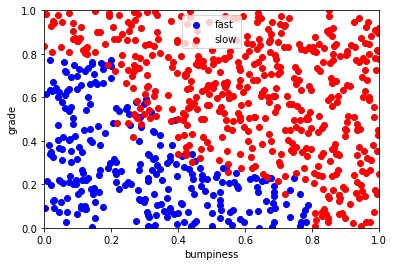

<ipython-input-39-5855acd1ac19>:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)


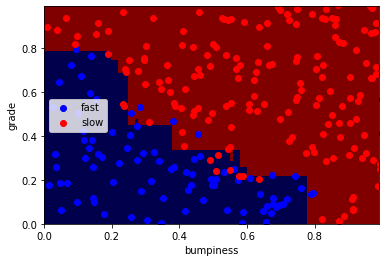

In [41]:
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
# from prep_terrain_data import makeTerrainData
# from class_vis import prettyPicture

features_train, labels_train, features_test, labels_test = makeTerrainData()


### the training data (features_train, labels_train) have both "fast" and "slow"
### points mixed together--separate them so we can give them different colors
### in the scatterplot and identify them visually
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]


#### initial visualization
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.scatter(bumpy_fast, grade_fast, color = "b", label="fast")
plt.scatter(grade_slow, bumpy_slow, color = "r", label="slow")
plt.legend()
plt.xlabel("bumpiness")
plt.ylabel("grade")
plt.show()
################################################################################


### your code here!  name your classifier object clf if you want the 
### visualization code (prettyPicture) to show you the decision boundary
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=50)
clf.fit(features_train, labels_train)


predictions = clf.predict(features_test)




try:
    prettyPicture(clf, features_test, labels_test)
except NameError:
    pass

In [43]:
from sklearn.metrics import accuracy_score
print('AdaBoost Classifier Model Accuracy:', accuracy_score(labels_test, predictions))

AdaBoost Classifier Model Accuracy: 0.924


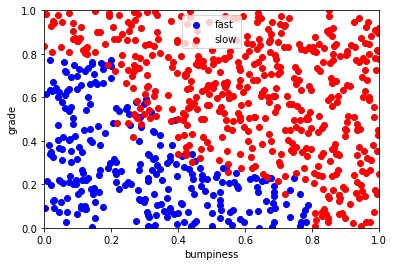

<ipython-input-39-5855acd1ac19>:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)


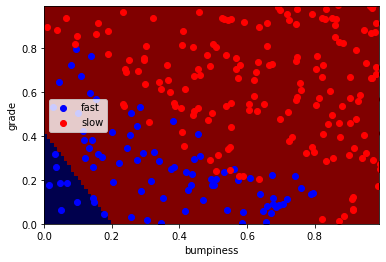

In [44]:
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
# from prep_terrain_data import makeTerrainData
# from class_vis import prettyPicture

features_train, labels_train, features_test, labels_test = makeTerrainData()


### the training data (features_train, labels_train) have both "fast" and "slow"
### points mixed together--separate them so we can give them different colors
### in the scatterplot and identify them visually
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]


#### initial visualization
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.scatter(bumpy_fast, grade_fast, color = "b", label="fast")
plt.scatter(grade_slow, bumpy_slow, color = "r", label="slow")
plt.legend()
plt.xlabel("bumpiness")
plt.ylabel("grade")
plt.show()
################################################################################


### your code here!  name your classifier object clf if you want the 
### visualization code (prettyPicture) to show you the decision boundary

#use support vector classifier
from sklearn.svm import SVC
from sklearn import metrics

svc = SVC(probability=True, kernel = 'linear')

clf = AdaBoostClassifier(n_estimators=50, base_estimator=svc, learning_rate=1)
clf.fit(features_train, labels_train)

svcpredictions = clf.predict(features_test)




try:
    prettyPicture(clf, features_test, labels_test)
except NameError:
    pass

In [45]:
print('accuracy:', metrics.accuracy_score(labels_test, svcpredictions))

accuracy: 0.696
